In [213]:
import numpy as np
import pandas as pd

audit_df1 = pd.read_csv("./audit_train.csv")
audit_df1.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [214]:
# Date Preprocessing
## 1. Check Date type and drop useless data
audit_df1.drop(columns = ["LOCATION_ID","Score", "SCORE_A", "SCORE_B",
                         "District", "Loss", "History"], inplace = True) # Because of feature importance, model can depend on SCORE.
audit_df1.head()

,Sector_score,PARA_A,PARA_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,LOSS_SCORE,History_score,Risk
0,3.89,4.18,2.50,6.68,5.0,2,3.38,2,2,2,1
1,3.89,0.00,4.83,4.83,5.0,2,0.94,2,2,2,0
2,3.89,0.51,0.23,0.74,5.0,2,0.00,2,2,2,0
3,3.89,0.00,10.80,10.80,6.0,6,11.75,6,2,2,1
4,3.89,0.00,0.08,0.08,5.0,2,0.00,2,2,2,0


In [215]:
## 2. fill or drop na
audit_df1.isnull().sum() # Check null value -> Money_Value

Sector_score     0
PARA_A           0
PARA_B           0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
LOSS_SCORE       0
History_score    0
Risk             0
dtype: int64

In [216]:
for col in audit_df1.columns:
    if(audit_df1[col] <= 0).all():
        print(f'{col}:null')

In [217]:
audit_df1["Money_Value"].fillna(audit_df1["Money_Value"].mean(), inplace = True) # fillna complete

C:\Users\ksung\AppData\Local\Temp\ipykernel_26492\2109966983.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [218]:
## 3. check duplications
audit_df1[audit_df1.duplicated()].count() # 13, but it is not duplicated value, not all same, and not too much for model

Sector_score     56
PARA_A           56
PARA_B           56
TOTAL            56
numbers          56
Marks            56
Money_Value      56
MONEY_Marks      56
LOSS_SCORE       56
History_score    56
Risk             56
dtype: int64

In [219]:
## 4. plot check
audit_df1.describe()    

,Sector_score,PARA_A,PARA_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,LOSS_SCORE,History_score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,10.799988,13.218481,5.067655,2.237113,14.137631,2.909794,2.061856,2.167526,0.626289
std,24.319017,5.678870,50.083624,51.312829,0.264449,0.803517,66.563533,1.597452,0.375080,0.679869,0.484100
min,1.850000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,0.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,0.405000,1.370000,5.000000,2.000000,0.095000,2.000000,2.000000,2.000000,1.000000
75%,55.570000,2.480000,4.160000,7.707500,5.000000,2.000000,5.630000,4.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,1264.630000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,6.000000,1.000000


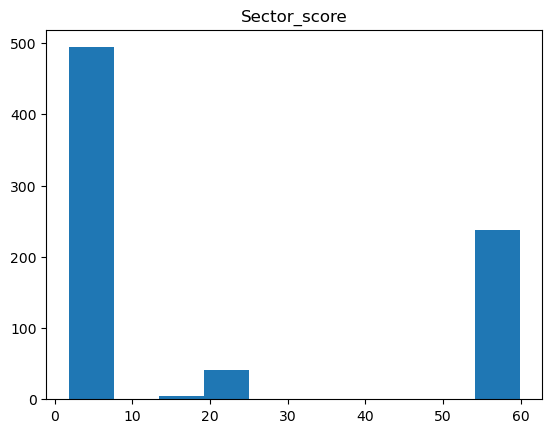

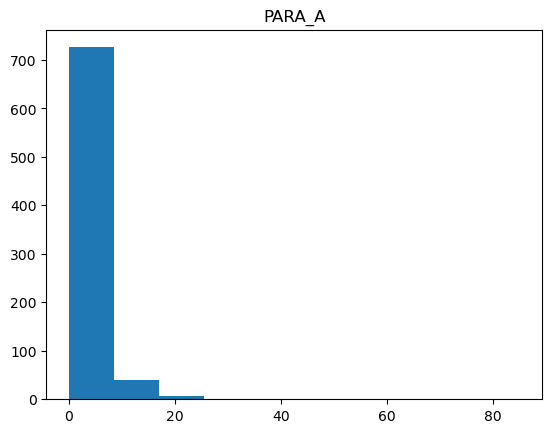

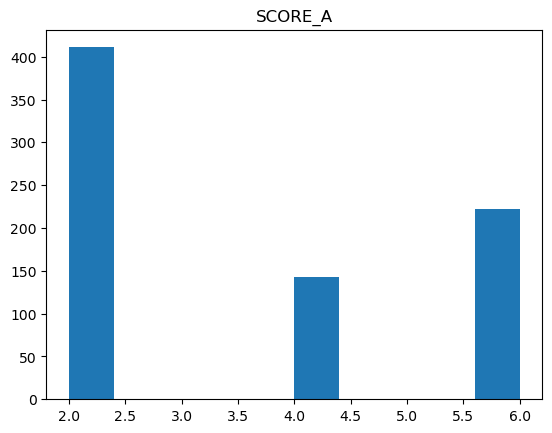

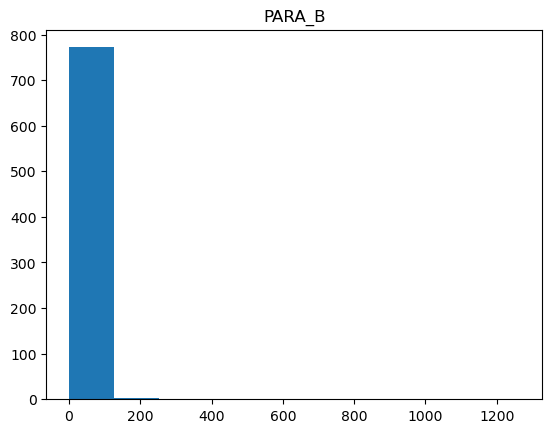

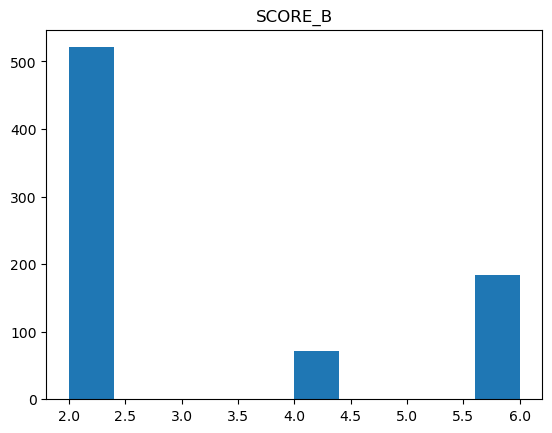

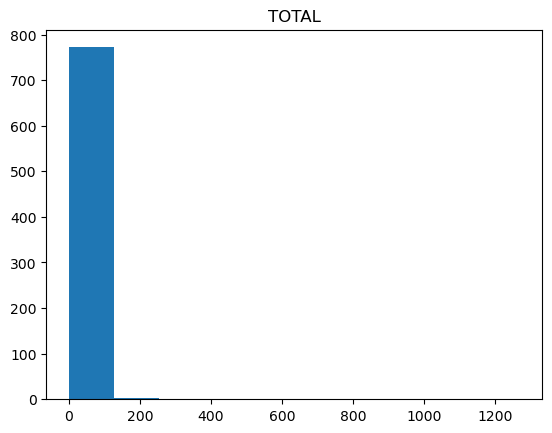

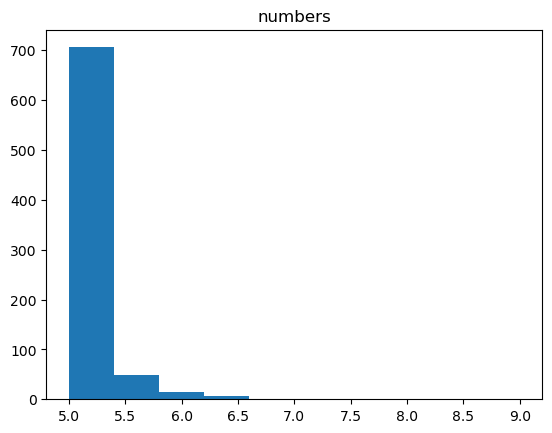

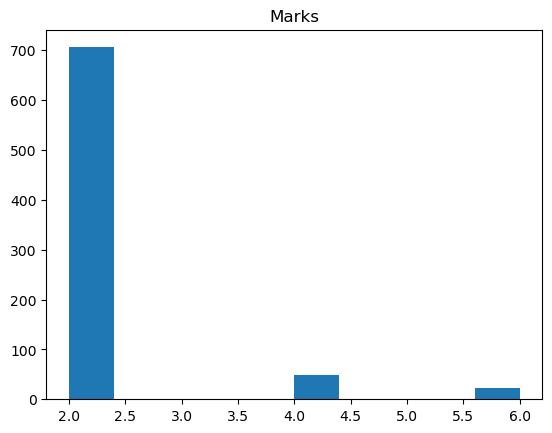

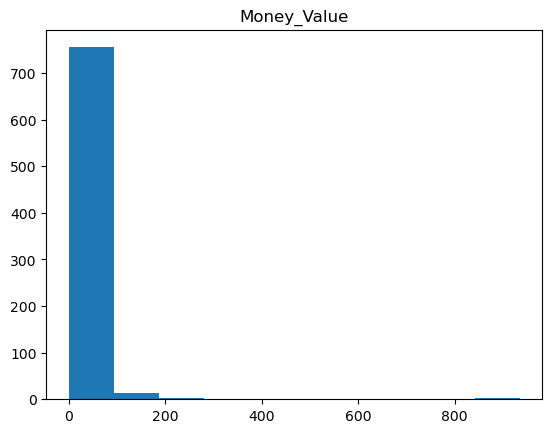

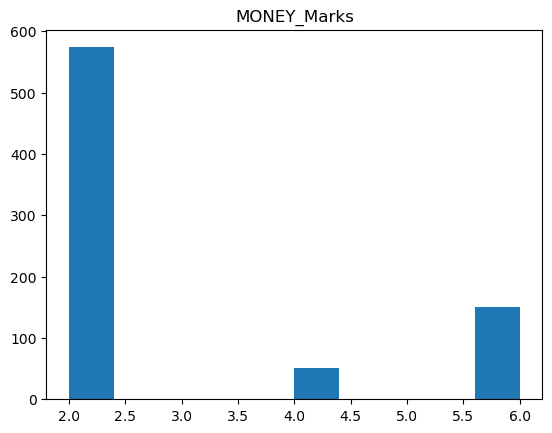

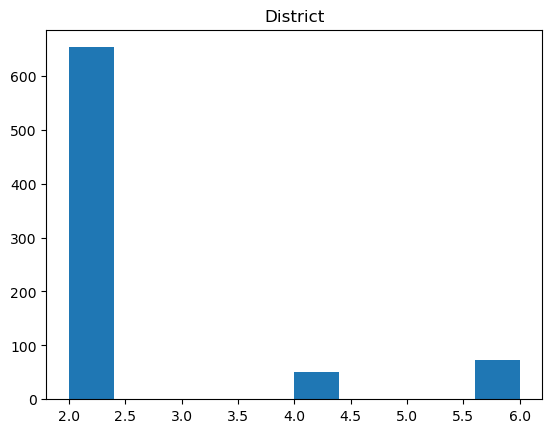

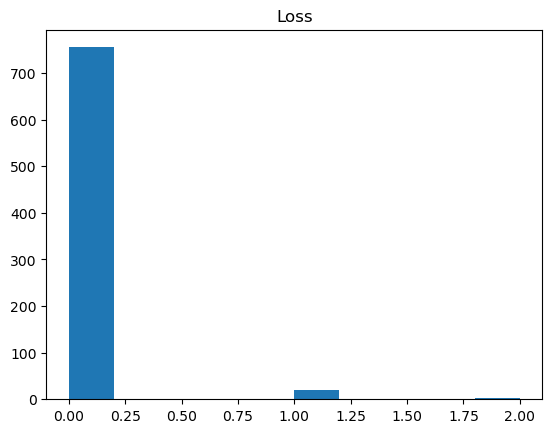

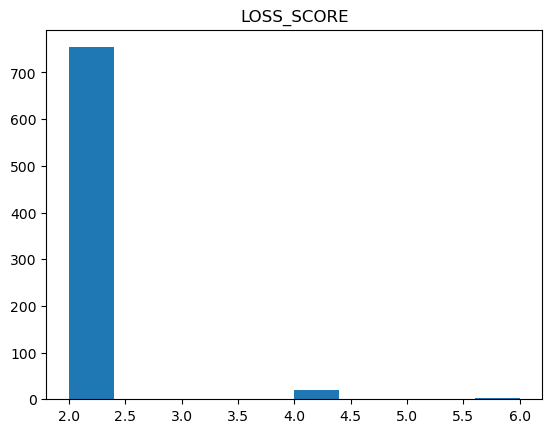

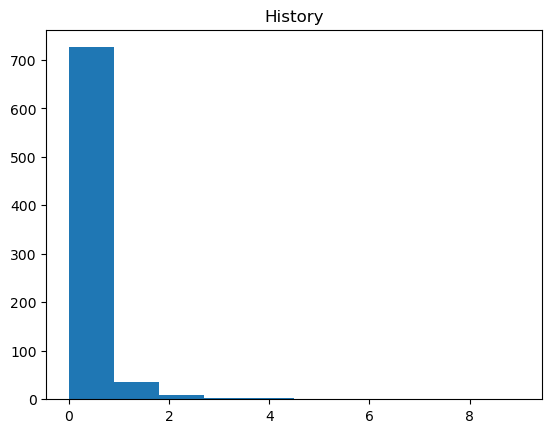

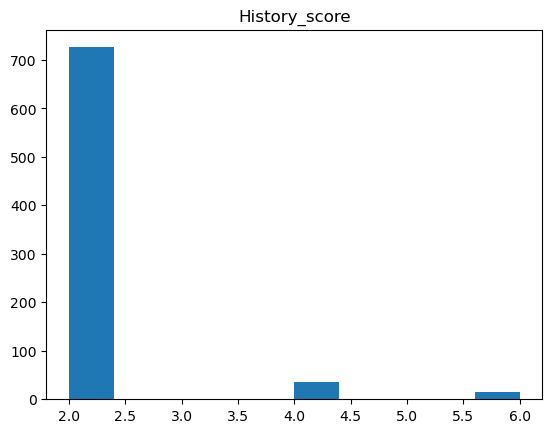

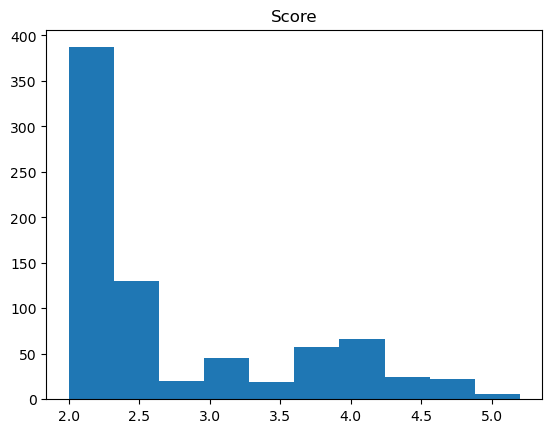

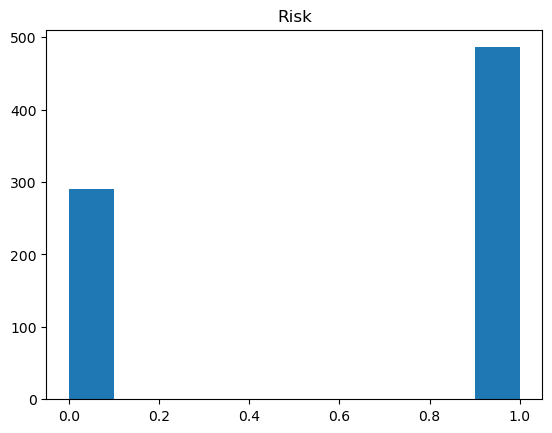

In [95]:
import matplotlib.pyplot as plt

for col in audit_df1.columns:
    plt.hist(audit_df1[col])
    plt.title(col)
    plt.show()

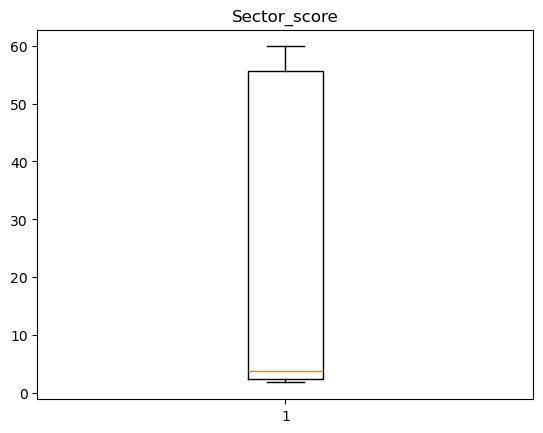

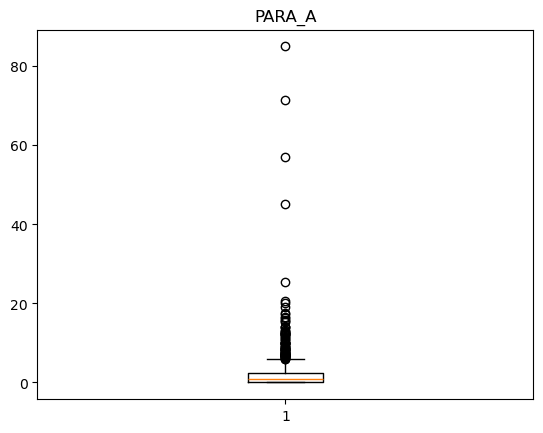

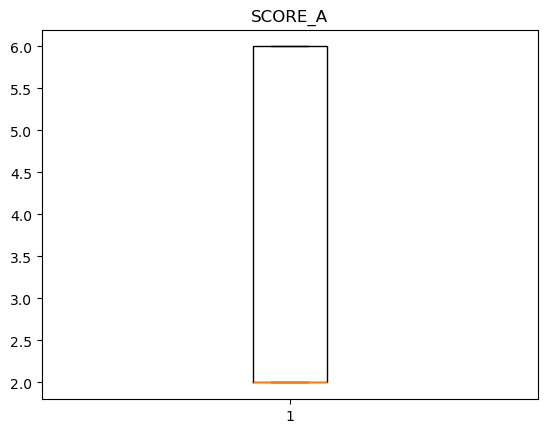

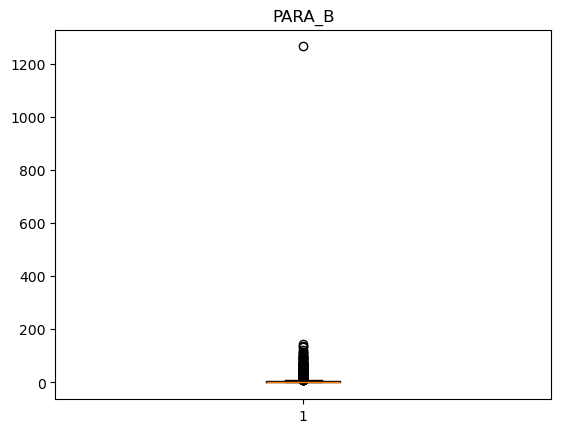

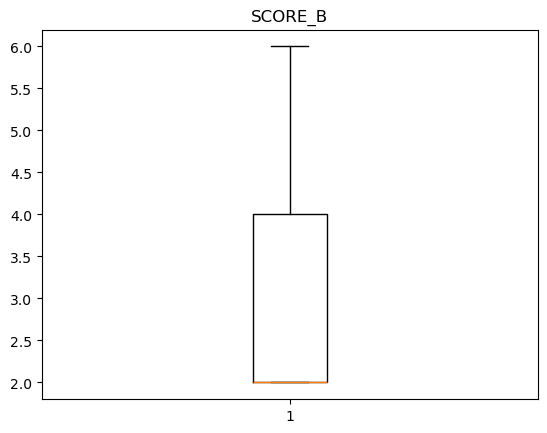

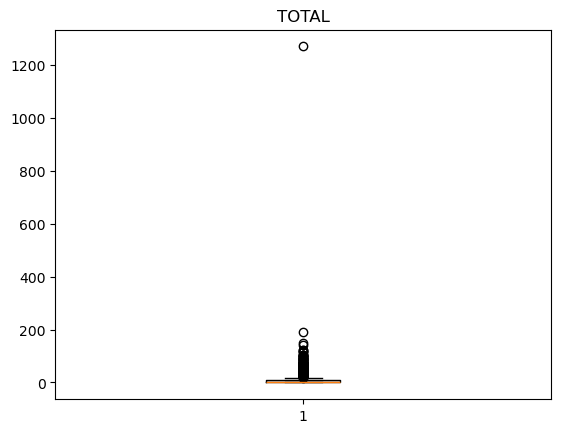

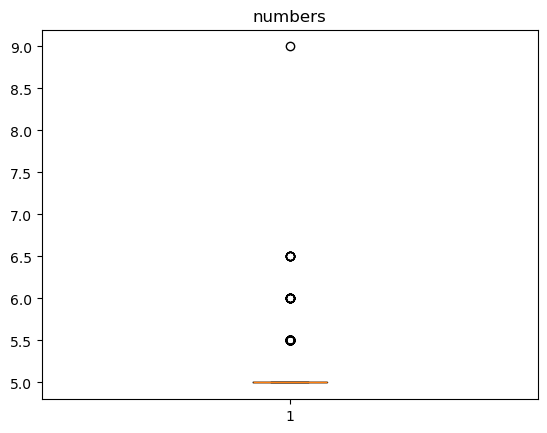

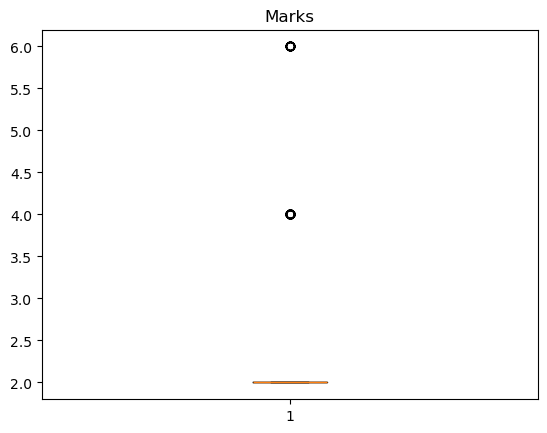

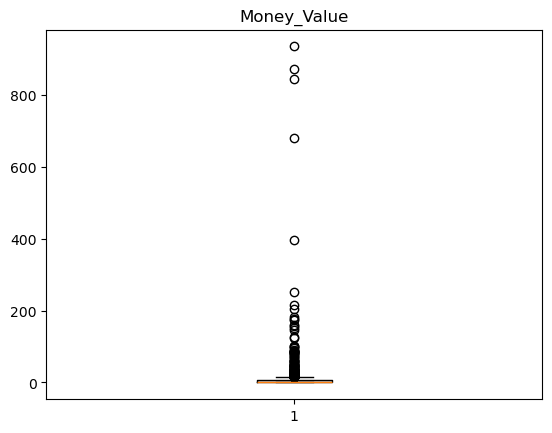

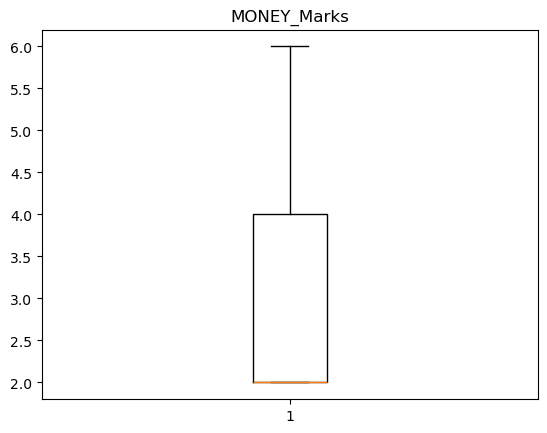

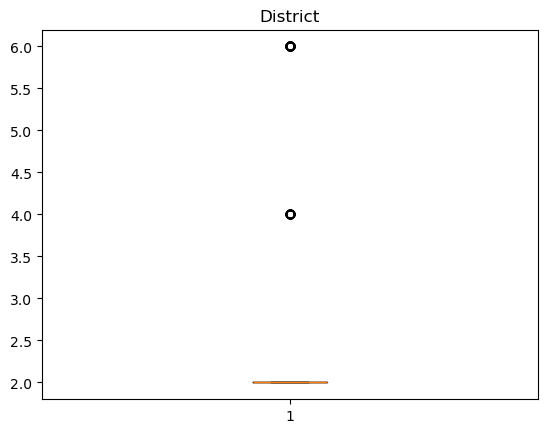

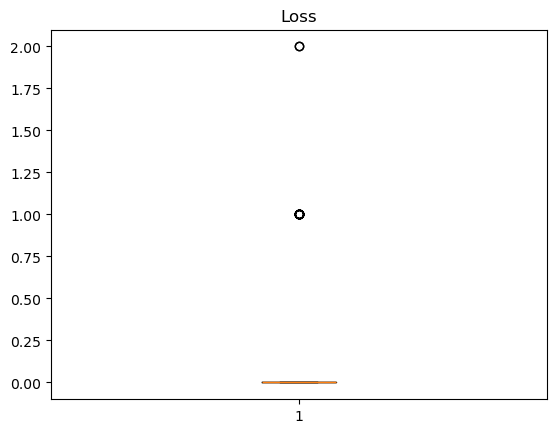

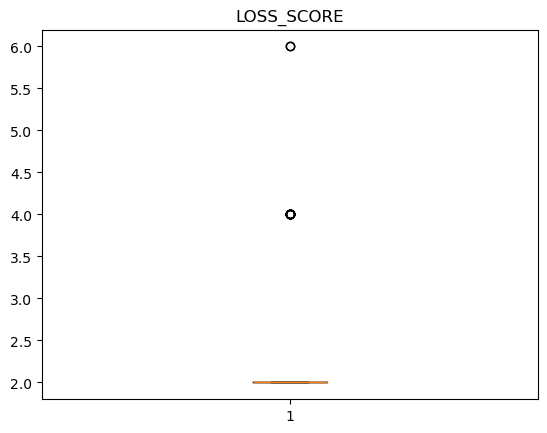

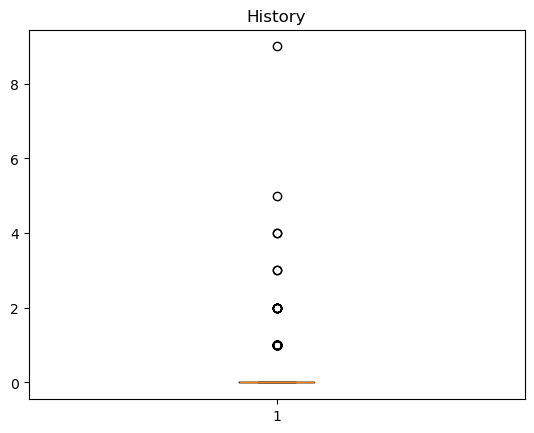

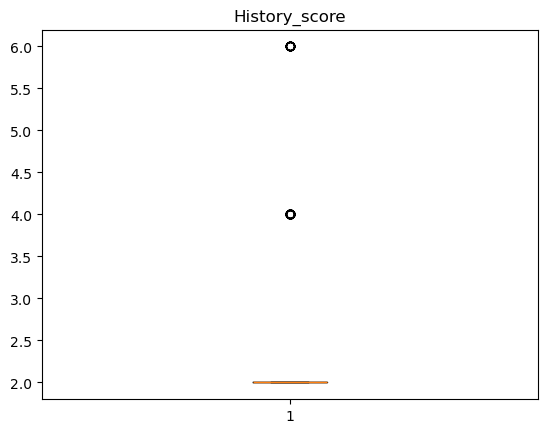

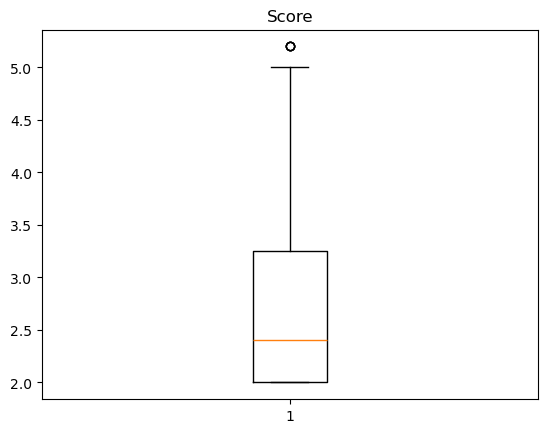

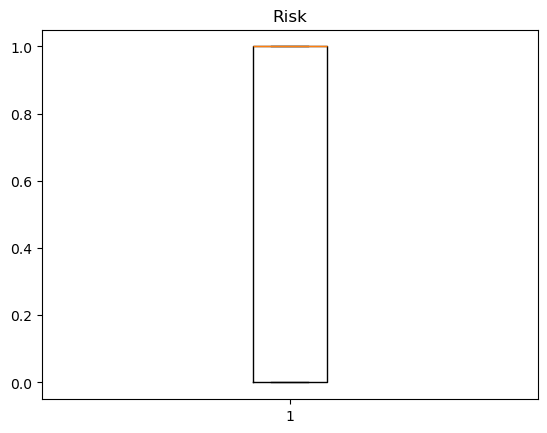

In [96]:
import matplotlib.pyplot as plt

for col in audit_df1.select_dtypes(include=['int64', 'float64']).columns:
    plt.boxplot(audit_df1[col].dropna())
    plt.title(col)
    plt.show()


In [220]:
# Check count of outliers.
# First, we will do classification, so we just let them,,,
for col in audit_df1.columns:
    q1 = audit_df1[col].quantile(0.25)
    q3 = audit_df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = audit_df1[(audit_df1[col] < lower_bound) | (audit_df1[col] > upper_bound)]
    print(f"{col}: 이상치 {len(outliers)}개")


Sector_score: 이상치 0개
PARA_A: 이상치 82개
PARA_B: 이상치 138개
TOTAL: 이상치 130개
numbers: 이상치 70개
Marks: 이상치 70개
Money_Value: 이상치 118개
MONEY_Marks: 이상치 0개
LOSS_SCORE: 이상치 22개
History_score: 이상치 50개
Risk: 이상치 0개


In [221]:
# Divide feature and target
X_features = audit_df1.iloc[:,:-1]
y_labels = audit_df1.iloc[:,-1]

X_features.shape # (776, 16)
X_features.head()

y_labels.shape # (776,)
y_labels.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [222]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Dividing Data
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.3, stratify=y_labels, random_state=42
)
# For validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# 2. Transition Log 
for col in X_train.columns:
    if (X_train[col] >= 0).all():
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])
        X_val[col] = np.log1p(X_val{col])

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 4. SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [223]:
# Target Balancing Check
print(y_train_resampled.value_counts(normalize=True)) 

Risk
0    0.5
1    0.5
Name: proportion, dtype: float64


In [232]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train_resampled, y_train_resampled)
pred = rf_clf.predict(X_test_scaled)

scores = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, scoring = 'accuracy', cv=3)
accuracy = accuracy_score(y_test, pred)

print("Accuracy of RF : {:.4f}".format(accuracy))
print(scores)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred)) # -> feature dependency

Accuracy of RF : 0.9270
[0.91189427 0.96475771 0.97787611]
[[ 81   6]
 [ 11 135]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        87
           1       0.96      0.92      0.94       146

    accuracy                           0.93       233
   macro avg       0.92      0.93      0.92       233
weighted avg       0.93      0.93      0.93       233



<Axes: xlabel='Risk', ylabel='Score'>

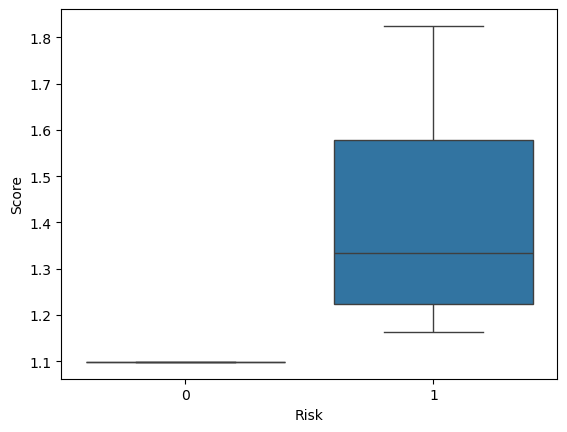

In [132]:
# import seaborn as sns

# # 예시: Score와 Risk의 관계
# sns.boxplot(x=y_train, y=X_train['Score'])


In [207]:
# X_train_scaled_df = pd.DataFrame(X_train_resampled, columns = X_train.columns)

In [208]:
# ## feature importane
# ftr_importances_values = rf_clf.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index = X_train_scaled_df.columns)
# ftr_importances.sort_values(ascending=False)


PARA_A           0.388262
TOTAL            0.252884
PARA_B           0.154845
Money_Value      0.076921
MONEY_Marks      0.051504
Sector_score     0.048002
LOSS_SCORE       0.015490
Marks            0.005213
numbers          0.004277
History_score    0.002602
dtype: float64

In [226]:
# XGB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Definition of model and fit
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, eval_metric="logloss")
xgb_wrapper.fit(X_train_resampled, y_train_resampled)

# 2. Predict
pred = xgb_wrapper.predict(X_test_scaled)
probs = xgb_wrapper.predict_proba(X_test_scaled)[:, 1]  # 확률값 (ROC-AUC 등 사용 시)

# 3. Evaluate
accuracy = accuracy_score(y_test, pred)
print("Accuracy of XGB : {:.4f}".format(accuracy))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, probs))

Accuracy of XGB : 0.9227
[[ 80   7]
 [ 11 135]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        87
           1       0.95      0.92      0.94       146

    accuracy                           0.92       233
   macro avg       0.91      0.92      0.92       233
weighted avg       0.92      0.92      0.92       233

0.9576838293182177


In [228]:
# Light GBM
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Definition of model and fit
xgb_wrapper = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train_resampled, y_train_resampled)

# 2. Predict
pred = xgb_wrapper.predict(X_test_scaled)
probs = xgb_wrapper.predict_proba(X_test_scaled)[:, 1]  # 확률값 (ROC-AUC 등 사용 시)

# 3. Evaluate
accuracy = accuracy_score(y_test, pred)
print("Accuracy of XGB : {:.4f}".format(accuracy))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, probs))

Accuracy of XGB : 0.9227
[[ 79   8]
 [ 10 136]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        87
           1       0.94      0.93      0.94       146

    accuracy                           0.92       233
   macro avg       0.92      0.92      0.92       233
weighted avg       0.92      0.92      0.92       233

0.9597307510628247


In [229]:
pip install --upgrade xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.6/150.0 MB 12.6 MB/s eta 0:00:12
   -- ------------------------------------- 7.6/150.0 MB 16.2 MB/s eta 0:00:09
   --- ------------------------------------ 12.6/150.0 MB 17.9 MB/s eta 0:00:08
   ---- ----------------------------------- 17.6/150.0 MB 18.2 MB/s eta 0:00:08
   ----- ---------------------------------- 20.7/150.0 MB 15.4 MB/s eta 0:00:09
   ------ --------------------------------- 23.9/150.0 MB 13.4 MB/s eta 0:00:10
   ------- -------------------------------- 28.8/150.0 MB 14.1 MB/s eta 0:00:09
   --------- ------------------------------ 33.8/150.0 MB 14.6 MB/s eta 0:00:08
   ---------- ----------------------------- 39.1/150.0 MB 15.3 MB/s eta 0:00:08
   ----------- ---------------------------- 42.2/150.0 MB 15.0 MB/s eta 0:00:08
   ------------ --------------------------- 48.5/150.

In [236]:
from hyperopt import hp, fmin, tpe, Trials
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. Search space
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 2. Set Objective Function
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate']
    )

    roc_auc_list = []

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    for tr_idx, val_idx in kf.split(X_train_resampled):
        X_tr, X_val_k = X_train_resampled[tr_idx], X_train_resampled[val_idx]
        y_tr, y_val_k = y_train_resampled[tr_idx], y_train_resampled[val_idx]

        lgbm_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric="auc",
            eval_set=[(X_val_k, y_val_k)],
            verbose=False
        )

        probas = lgbm_clf.predict_proba(X_val_k)[:, 1]
        score = roc_auc_score(y_val_k, probas)
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 3. Optimization
trials = Trials()
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print("최적 하이퍼파라미터:", best)

# 100%|███████████████████████████████████████████████| 50/50 [00:35<00:00,  1.39trial/s, best loss: -0.9691490975739979]
# 최적 하이퍼파라미터: {'learning_rate': 0.18468896974663007, 'max_depth': 117.0, 'min_child_samples': 60.0, 'num_leaves': 46.0, 'subsample': 0.9445328406322729}

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

  2%|▉                                               | 1/50 [00:00<00:28,  1.73trial/s, best loss: -0.9518927728051049]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

  4%|█▉                                              | 2/50 [00:01<00:47,  1.02trial/s, best loss: -0.9637670190289113]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

  6%|██▉                                             | 3/50 [00:02<00:46,  1.02trial/s, best loss: -0.9637670190289113]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

  8%|███▊                                            | 4/50 [00:03<00:46,  1.02s/trial, best loss: -0.9642672023701038]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 10%|████▊                                           | 5/50 [00:04<00:37,  1.21trial/s, best loss: -0.9642672023701038]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 12%|█████▊                                          | 6/50 [00:04<00:32,  1.35trial/s, best loss: -0.9642672023701038]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 14%|██████▋                                         | 7/50 [00:05<00:27,  1.56trial/s, best loss: -0.9642672023701038]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 16%|███████▋                                        | 8/50 [00:06<00:29,  1.42trial/s, best loss: -0.9647293714438719]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 18%|████████▋                                       | 9/50 [00:06<00:29,  1.41trial/s, best loss: -0.9647293714438719]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 20%|█████████▍                                     | 10/50 [00:07<00:28,  1.41trial/s, best loss: -0.9647293714438719]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 22%|██████████▎                                    | 11/50 [00:08<00:28,  1.37trial/s, best loss: -0.9666191016209241]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 24%|███████████▎                                   | 12/50 [00:09<00:26,  1.45trial/s, best loss: -0.9666191016209241]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 26%|████████████▏                                  | 13/50 [00:09<00:23,  1.59trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 28%|█████████████▏                                 | 14/50 [00:10<00:23,  1.56trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 30%|██████████████                                 | 15/50 [00:11<00:32,  1.07trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 32%|███████████████                                | 16/50 [00:12<00:29,  1.14trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 34%|███████████████▉                               | 17/50 [00:13<00:33,  1.02s/trial, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 36%|████████████████▉                              | 18/50 [00:14<00:31,  1.02trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 38%|█████████████████▊                             | 19/50 [00:15<00:28,  1.08trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 40%|██████████████████▊                            | 20/50 [00:16<00:23,  1.28trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 42%|███████████████████▋                           | 21/50 [00:16<00:19,  1.48trial/s, best loss: -0.9672995373196361]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 44%|████████████████████▋                          | 22/50 [00:16<00:16,  1.65trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 46%|█████████████████████▌                         | 23/50 [00:17<00:18,  1.45trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 48%|██████████████████████▌                        | 24/50 [00:18<00:20,  1.26trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 50%|███████████████████████▌                       | 25/50 [00:19<00:16,  1.49trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 52%|████████████████████████▍                      | 26/50 [00:21<00:24,  1.03s/trial, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 54%|█████████████████████████▍                     | 27/50 [00:21<00:19,  1.19trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 56%|██████████████████████████▎                    | 28/50 [00:21<00:15,  1.40trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 58%|███████████████████████████▎                   | 29/50 [00:22<00:13,  1.61trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 60%|████████████████████████████▏                  | 30/50 [00:23<00:13,  1.47trial/s, best loss: -0.9687207771095045]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 62%|█████████████████████████████▏                 | 31/50 [00:23<00:11,  1.59trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 64%|██████████████████████████████                 | 32/50 [00:24<00:11,  1.61trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 66%|███████████████████████████████                | 33/50 [00:24<00:11,  1.54trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 68%|███████████████████████████████▉               | 34/50 [00:25<00:11,  1.37trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 70%|████████████████████████████████▉              | 35/50 [00:26<00:09,  1.53trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 72%|█████████████████████████████████▊             | 36/50 [00:27<00:10,  1.39trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 74%|██████████████████████████████████▊            | 37/50 [00:27<00:08,  1.46trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 76%|███████████████████████████████████▋           | 38/50 [00:28<00:07,  1.58trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 78%|████████████████████████████████████▋          | 39/50 [00:28<00:06,  1.72trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 80%|█████████████████████████████████████▌         | 40/50 [00:29<00:06,  1.53trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 82%|██████████████████████████████████████▌        | 41/50 [00:30<00:07,  1.28trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 84%|███████████████████████████████████████▍       | 42/50 [00:31<00:05,  1.39trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 86%|████████████████████████████████████████▍      | 43/50 [00:31<00:04,  1.56trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 88%|█████████████████████████████████████████▎     | 44/50 [00:32<00:03,  1.81trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 90%|██████████████████████████████████████████▎    | 45/50 [00:32<00:03,  1.60trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 92%|███████████████████████████████████████████▏   | 46/50 [00:33<00:02,  1.60trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 94%|████████████████████████████████████████████▏  | 47/50 [00:33<00:01,  1.86trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




 96%|█████████████████████████████████████████████  | 48/50 [00:34<00:01,  1.91trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3

 98%|██████████████████████████████████████████████ | 49/50 [00:35<00:00,  1.59trial/s, best loss: -0.9691490975739979]

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




100%|███████████████████████████████████████████████| 50/50 [00:35<00:00,  1.39trial/s, best loss: -0.9691490975739979]
최적 하이퍼파라미터: {'learning_rate': 0.18468896974663007, 'max_depth': 117.0, 'min_child_samples': 60.0, 'num_leaves': 46.0, 'subsample': 0.9445328406322729}


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




In [237]:
# 1. Fit with best values
final_lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=best['learning_rate'],
    max_depth=int(best['max_depth']),
    num_leaves=int(best['num_leaves']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    random_state=42
)
final_lgbm.fit(X_train_resampled, y_train_resampled)

# 2. Predict
pred = final_lgbm.predict(X_test_scaled)
probs = final_lgbm.predict_proba(X_test_scaled)[:, 1]  # 확률값 (ROC-AUC 등 사용 시)

# 3. Evaluate
accuracy = accuracy_score(y_test, pred)
print("Accuracy of XGB : {:.4f}".format(accuracy))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, probs))

Accuracy of XGB : 0.9056
[[ 77  10]
 [ 12 134]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        87
           1       0.93      0.92      0.92       146

    accuracy                           0.91       233
   macro avg       0.90      0.90      0.90       233
weighted avg       0.91      0.91      0.91       233

0.9548102660998268


In [241]:
# Logistic Regression with GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear', 'lbfgs'],
          'penalty' : ['l2', 'l1'],
          'C' : [0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(X_train_resampled, y_train_resampled)
print(grid_clf.best_params_, grid_clf.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} 0.9103088898418515


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 

In [244]:
from sklearn.linear_model import LogisticRegression

# 1. Fit with best values from GridSearchCV
final_lr = LogisticRegression(
    solver=grid_clf.best_params_['solver'],
    penalty=grid_clf.best_params_['penalty'],
    C=grid_clf.best_params_['C']
)
final_lr.fit(X_train_resampled, y_train_resampled)

# 2. Predict
pred = final_lr.predict(X_test_scaled)
probs = final_lr.predict_proba(X_test_scaled)[:, 1]

# 3. Evaluate
accuracy = accuracy_score(y_test, pred)
print("Accuracy of LR : {:.4f}".format(accuracy))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, probs))


Accuracy of LR : 0.9356
[[ 86   1]
 [ 14 132]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        87
           1       0.99      0.90      0.95       146

    accuracy                           0.94       233
   macro avg       0.93      0.95      0.93       233
weighted avg       0.94      0.94      0.94       233

0.9641788694693749
